## Healthcare data Science

How to build a simple model 

In [2]:
# load the compressed files and
import gzip

for filename in ["data/ADMISSIONS.csv.gz", "data/NOTEEVENTS.csv.gz"]:
    with gzip.open(filename, 'rt') as f:
        data = f.read()
        
    with open(filename[:-3], 'wt') as f:
        f.write(data)

In [3]:
# load admissions table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read admissions table
adm_df = pd.read_csv('data/ADMISSIONS.csv')

adm_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [4]:
# show dimensions
adm_df.shape

(58976, 19)

In [5]:
# full list of columns containing the data categories 
categories = adm_df.columns.ravel()

In [6]:
categories

array(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype=object)

In [7]:
adm_df.groupby(['ADMISSION_TYPE']).size()

ADMISSION_TYPE
ELECTIVE      7706
EMERGENCY    42071
NEWBORN       7863
URGENT        1336
dtype: int64

In [8]:
# convert to dates
adm_df.ADMITTIME = pd.to_datetime(adm_df.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
adm_df.DISCHTIME = pd.to_datetime(adm_df.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
adm_df.DEATHTIME = pd.to_datetime(adm_df.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [9]:
# check to see if there are any missing dates
print('Number of missing date admissions:', adm_df.ADMITTIME.isnull().sum())
print('Number of missing date discharges:', adm_df.DISCHTIME.isnull().sum())

Number of missing date admissions: 0
Number of missing date discharges: 0


In [10]:
# sort by subject_ID and admission date
adm_df = adm_df.sort_values(['SUBJECT_ID','ADMITTIME'])
adm_df = adm_df.reset_index(drop = True)

In [12]:
adm_df.head(20)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1
5,6,7,118037,2121-05-23 15:05:00,2121-05-27 11:57:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
6,7,8,159514,2117-11-20 10:22:00,2117-11-24 14:20:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
7,8,9,150750,2149-11-09 13:06:00,2149-11-14 10:15:00,2149-11-14 10:15:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicaid,NaN,UNOBTAINABLE,NaN,UNKNOWN/NOT SPECIFIED,2149-11-09 11:13:00,2149-11-09 13:18:00,HEMORRHAGIC CVA,1,1
8,9,10,184167,2103-06-28 11:36:00,2103-07-06 12:10:00,NaT,NEWBORN,PHYS REFERRAL/NORMAL DELI,SHORT TERM HOSPITAL,Medicaid,NaN,UNOBTAINABLE,NaN,BLACK/AFRICAN AMERICAN,NaN,NaN,NEWBORN,0,1
9,10,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,NaN,OTHER,MARRIED,WHITE,2178-04-15 20:46:00,2178-04-16 06:53:00,BRAIN MASS,0,1


In [13]:

# verify that it did what we wanted
adm_df.loc[adm_df.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE
165,124,2160-06-24 21:25:00,EMERGENCY
166,124,2161-12-17 03:39:00,EMERGENCY
167,124,2165-05-21 21:02:00,ELECTIVE
168,124,2165-12-31 18:55:00,EMERGENCY


In [15]:
# add the next admission date and type for each subject using groupby
# you have to use groupby otherwise the dates will be from different subjects
adm_df['NEXT_ADMITTIME'] = adm_df.groupby('SUBJECT_ID').ADMITTIME.shift(-1)
# get the next admission type
adm_df['NEXT_ADMISSION_TYPE'] = adm_df.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

In [17]:
# verify that it did what we wanted
adm_df.loc[adm_df.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
165,124,2160-06-24 21:25:00,EMERGENCY,2161-12-17 03:39:00,EMERGENCY
166,124,2161-12-17 03:39:00,EMERGENCY,2165-05-21 21:02:00,ELECTIVE
167,124,2165-05-21 21:02:00,ELECTIVE,2165-12-31 18:55:00,EMERGENCY
168,124,2165-12-31 18:55:00,EMERGENCY,NaT,NaN


In [20]:
# get rows where next admission is elective and replace with naT or nan
rows = adm_df.NEXT_ADMISSION_TYPE == 'ELECTIVE'
adm_df.loc[rows,'NEXT_ADMITTIME'] = pd.NaT
adm_df.loc[rows,'NEXT_ADMISSION_TYPE'] = np.NaN

In [21]:
# verify that it did what we wanted
adm_df.loc[adm_df.SUBJECT_ID == 124,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
165,124,2160-06-24 21:25:00,EMERGENCY,2161-12-17 03:39:00,EMERGENCY
166,124,2161-12-17 03:39:00,EMERGENCY,NaT,NaN
167,124,2165-05-21 21:02:00,ELECTIVE,2165-12-31 18:55:00,EMERGENCY
168,124,2165-12-31 18:55:00,EMERGENCY,NaT,NaN


In [22]:
# sort by subject_ID and admission date
# it is safer to sort right before the fill incase something changed the order above
adm_df = adm_df.sort_values(['SUBJECT_ID','ADMITTIME'])

# back fill (this will take a little while)
adm_df[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = adm_df.groupby(['SUBJECT_ID'])\
                            [['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')

In [24]:
# calculate the number of days between discharge and next admission
adm_df['DAYS_NEXT_ADMIT']=  (adm_df.NEXT_ADMITTIME - adm_df.DISCHTIME).dt.total_seconds()/(24*60*60)

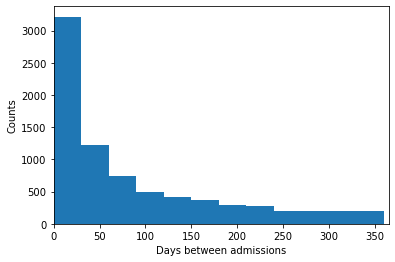

In [26]:
# plot a histogram of days between readmissions if they exist
# this only works for non-null values so you have to filter
plt.hist(adm_df.loc[~adm_df.DAYS_NEXT_ADMIT.isnull(),'DAYS_NEXT_ADMIT'], bins =range(0,365,30))
plt.xlim([0,365])
plt.xlabel('Days between admissions')
plt.ylabel('Counts')
plt.show()

In [27]:
print('Number with a readmission:', (~adm_df.DAYS_NEXT_ADMIT.isnull()).sum())
print('Total Number:', len(adm_df))

Number with a readmission: 11399
Total Number: 58976


In [28]:
notes_df = pd.read_csv("data/NOTEEVENTS.csv")

/Users/marina/opt/anaconda3/envs/nlp_clin/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print('Number of notes:',len(notes_df))

In [29]:
notes_df.CATEGORY.unique()

array(['Discharge summary', 'Echo', 'ECG', 'Nursing', 'Physician ',
       'Rehab Services', 'Case Management ', 'Respiratory ', 'Nutrition',
       'General', 'Social Work', 'Pharmacy', 'Consult', 'Radiology',
       'Nursing/other'], dtype=object)

In [30]:
notes_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [31]:
# look at the first note
notes_df.TEXT.iloc[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [32]:
# filter to discharge summary
df_notes_dis_sum = notes_df.loc[notes_df.CATEGORY == 'Discharge summary']

In [34]:
df_notes_dis_sum

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
60411,59608,93924,135672.0,2104-06-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 18321**],[**Known fir..."
60412,59609,17782,155710.0,2112-03-31,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname 2706**], [**Known fir..."
60413,59621,96333,183951.0,2197-06-18,NaN,NaN,Discharge summary,Addendum,NaN,NaN,Name: [**Known lastname 18357**]-[**Known las...
60414,59622,66717,169165.0,2129-08-14,NaN,NaN,Discharge summary,Addendum,NaN,NaN,"Name: [**Known lastname **],[**Known firstnam..."


In [33]:
# The assert keyword lets you test if a condition in your code returns True,
# in this case if there are no multiple discharge summaries
# if not, the program will raise an AssertionError.

assert df_notes_dis_sum.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'

AssertionError: Multiple discharge summaries per admission

In [36]:
df_notes_dis_sum_last = (df_notes_dis_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()

assert df_notes_dis_sum_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'

In [37]:
# merge datasets
df_adm_notes = pd.merge(adm_df[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DAYS_NEXT_ADMIT',\
                                'NEXT_ADMITTIME','ADMISSION_TYPE','DEATHTIME']],
                        df_notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']], 
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')

assert len(adm_df) == len(df_adm_notes), 'Number of rows increased'

In [38]:
df_adm_notes.groupby('ADMISSION_TYPE').apply(\
                lambda g: g.TEXT.isnull().sum())/df_adm_notes.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.048663
EMERGENCY    0.037983
NEWBORN      0.536691
URGENT       0.042665
dtype: float64

In [39]:
# Remove NEWBORN

In [40]:
df_adm_notes_clean = df_adm_notes.loc[df_adm_notes.ADMISSION_TYPE != 'NEWBORN'].copy()

In [41]:
print('Fraction of missing notes:', df_adm_notes_clean.TEXT.isnull().sum() / len(df_adm_notes_clean))
print('Fraction notes with newlines:', df_adm_notes_clean.TEXT.str.contains('\n').sum() / len(df_adm_notes_clean))
print('Fraction notes with carriage returns:', df_adm_notes_clean.TEXT.str.contains('\r').sum() / len(df_adm_notes_clean))

Fraction of missing notes: 0.03971592354195606
Fraction notes with newlines: 0.9602840764580439
Fraction notes with carriage returns: 0.0


In [42]:
df_adm_notes_newborn_clean = df_adm_notes.loc[df_adm_notes.ADMISSION_TYPE == 'NEWBORN'].copy()

In [43]:
df_adm_notes_newborn_clean.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,TEXT
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NaT,NEWBORN,NaT,NaN
3,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NaT,NEWBORN,NaT,NaN
5,7,118037,2121-05-23 15:05:00,2121-05-27 11:57:00,NaN,NaT,NEWBORN,NaT,NaN
6,8,159514,2117-11-20 10:22:00,2117-11-24 14:20:00,NaN,NaT,NEWBORN,NaT,NaN
8,10,184167,2103-06-28 11:36:00,2103-07-06 12:10:00,NaN,NaT,NEWBORN,NaT,Admission Date: [**2103-6-28**] Dischar...


In [45]:
print('Fraction of missing notes:', df_adm_notes_newborn_clean.TEXT.isnull().sum() / len(df_adm_notes_newborn_clean))
print('Fraction notes with newlines:', df_adm_notes_newborn_clean.TEXT.str.contains('\n').sum() / len(df_adm_notes_newborn_clean))
print('Fraction notes with carriage returns:', df_adm_notes_newborn_clean.TEXT.str.contains('\r').sum() / len(df_adm_notes_newborn_clean))

Fraction of missing notes: 0.5366908304718301
Fraction notes with newlines: 0.4633091695281699
Fraction notes with carriage returns: 0.0


In [47]:
#readmission
df_adm_notes_clean['OUTPUT_LABEL'] = (df_adm_notes_clean.DAYS_NEXT_ADMIT < 30).astype('int')
    

In [48]:
print('Number of positive samples:', (df_adm_notes_clean.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:',  (df_adm_notes_clean.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(df_adm_notes_clean))

Number of positive samples: 3004
Number of negative samples: 48109
Total samples: 51113


In [49]:
df_adm_notes_clean = df_adm_notes_clean.sample(n = len(df_adm_notes_clean), random_state = 42)
df_adm_notes_clean = df_adm_notes_clean.reset_index(drop = True)

# Save 30% of the data as validation and test data 
df_valid_test=df_adm_notes_clean.sample(frac=0.30,random_state=42)

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

# use the rest of the data as training data
df_train_all=df_adm_notes_clean.drop(df_valid_test.index)

In [50]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),df_test.OUTPUT_LABEL.sum()/ len(df_test)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),df_valid.OUTPUT_LABEL.sum()/ len(df_valid)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), df_train_all.OUTPUT_LABEL.sum()/ len(df_train_all)))
print('all samples (n = %d)'%len(df_adm_notes_clean))
assert len(df_adm_notes_clean) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

Test prevalence(n = 7667):0.062
Valid prevalence(n = 7667):0.057
Train all prevalence(n = 35779):0.058
all samples (n = 51113)


In [51]:
df_train_all.to_csv('data/df_train_all.csv',index=False)
df_valid.to_csv('data/df_valid.csv',index=False)
df_test.to_csv('data/df_test.csv',index=False)